In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from scipy import stats

marathon_all = pd.read_csv("../Resources/final_runners_df.csv", low_memory=False)

marathon_all.head()

,Unnamed: 0,Bib,Name,M/F,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
0,0,3,"Desisa, Lelisa",M,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,2:09:17,1,2015
1,1,4,"Tsegay, Yemane Adhane",M,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,2:09:48,2,2015
2,2,8,"Chebet, Wilson",M,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,2:10:22,3,2015
3,3,11,"Kipyego, Bernard",M,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,2:10:47,4,2015
4,4,10,"Korir, Wesley",M,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,2:10:49,5,2015


In [2]:
def time_convert(x):
    times = x.split(':')
    return (3600*int(times[0])+60*int(times[1]))+int(times[2])

In [3]:
marathon_all['5k'] = marathon_all['5K'].apply(time_convert)
marathon_all['10k'] = marathon_all['10K'].apply(time_convert)
marathon_all['15k'] = marathon_all['15K'].apply(time_convert)
marathon_all['20k'] = marathon_all['20K'].apply(time_convert)
marathon_all['25k'] = marathon_all['25K'].apply(time_convert)
marathon_all['30k'] = marathon_all['30K'].apply(time_convert)
marathon_all['35k'] = marathon_all['35K'].apply(time_convert)
marathon_all['40k'] = marathon_all['40K'].apply(time_convert)
marathon_all['Official-Time'] = marathon_all['Official Time'].apply(time_convert)

marathon_all.head()

,Unnamed: 0,Bib,Name,M/F,5K,10K,15K,20K,Half,25K,...,Year,5k,10k,15k,20k,25k,30k,35k,40k,Official-Time
0,0,3,"Desisa, Lelisa",M,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,...,2015,883,1783,2697,3629,4567,5520,6479,7359,7757
1,1,4,"Tsegay, Yemane Adhane",M,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,...,2015,883,1783,2698,3628,4567,5519,6479,7362,7788
2,2,8,"Chebet, Wilson",M,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,...,2015,883,1783,2697,3629,4567,5520,6479,7381,7822
3,3,11,"Kipyego, Bernard",M,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,...,2015,883,1784,2701,3629,4567,5520,6483,7427,7847
4,4,10,"Korir, Wesley",M,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,...,2015,883,1784,2698,3628,4567,5520,6479,7407,7849


In [4]:
marathon_bib = pd.DataFrame(marathon_all)

marathon_bib = marathon_bib[['Bib', 'M/F', 'Official-Time']]

# remove characters from Bib column
marathon_bib['Bib'] = marathon_bib['Bib'].str.extract('(\d+)').astype(int)

# Convert data to numeric
marathon_bib['Bib'] = pd.to_numeric(marathon_bib['Bib'])
marathon_bib['Official-Time'] = pd.to_numeric(marathon_bib['Official-Time'])

marathon_bib.head()

,Bib,M/F,Official-Time
0,3,M,7757
1,4,M,7788
2,8,M,7822
3,11,M,7847
4,10,M,7849


In [5]:
marathon_bib.sort_values('Official-Time')
marathon_bib.reset_index

# Scipy function to create a dataframe with only the 10th percentile of runners
tenth_percentile = stats.scoreatpercentile(marathon_bib['Official-Time'], 10)
print(tenth_percentile)

top_10_percent_df = marathon_bib.loc[marathon_bib['Official-Time'] <= tenth_percentile, :]


11126.0


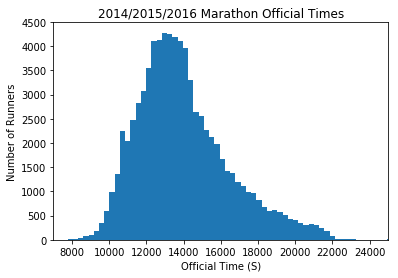

In [6]:
# Histogram of runners and Official time. 
# Based on the histogram shape and poplulation size - 
# I will assume a normal distribution to perform a confidence test

plt.hist(marathon_bib['Official-Time'], bins=80)
plt.xlim(7000, 25000)
plt.title('2014/2015/2016 Marathon Official Times')
plt.ylabel('Number of Runners')
plt.xlabel('Official Time (S)')
plt.savefig('Images/runners_histogram.png')
plt.show()


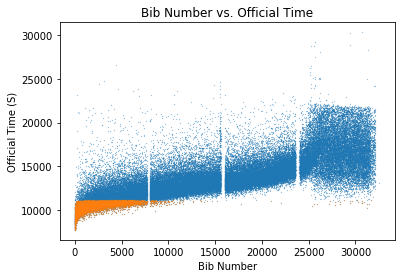

In [7]:
y_data = marathon_bib['Official-Time']
x_data = marathon_bib['Bib']

zy_data = top_10_percent_df['Official-Time']
zx_data = top_10_percent_df['Bib']

plt.scatter(x_data, y_data, s = 0.03)
plt.scatter(zx_data, zy_data, s = 0.03)

plt.title('Bib Number vs. Official Time')
plt.xlabel('Bib Number')
plt.ylabel('Official Time (S)')

plt.savefig('Images/bib_vs_ot.png')
plt.show()

In [8]:
### 4TH wave shows no correlation between Bib Number and Official Time.
### Qualifying times for the 4th wave vary wildly so I will ignore 4th wave in the analysis

In [9]:
# dataframe without the 4th wave
no_4th_wave_df = marathon_bib.loc[marathon_bib['Bib'] < 23800, :]

r-squared: 0.4699
Standard error: 0.0007695
Linear Regression: y = 0.176x + 10950


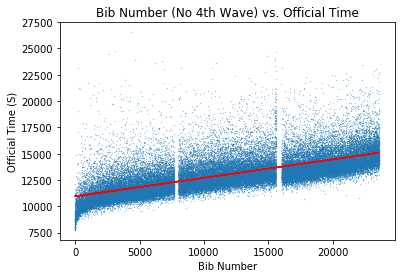

In [10]:
yy_data = no_4th_wave_df['Official-Time']
xx_data = no_4th_wave_df['Bib']

plt.scatter(xx_data, yy_data, s = 0.03)

stats.linregress(xx_data,yy_data)

slope, intercept, r_value, p_value, std_err = stats.linregress(xx_data, yy_data)

r_squared = r_value**2

print(f'r-squared: {r_squared:.4}')
print(f'Standard error: {std_err:.4}')
print(f'Linear Regression: y = {slope:.3}x + {intercept:.0f}')

plt.title('Bib Number (No 4th Wave) vs. Official Time')
plt.xlabel('Bib Number')
plt.ylabel('Official Time (S)')

plt.plot(xx_data, intercept + slope*xx_data, 'r', label='fitted line')

plt.savefig('Images/regression.png')
plt.show()

In [11]:
# example data point for graph
y_2500 = intercept + slope * 2500

In [12]:
regression_eq = intercept + slope * xx_data
sum_errs = sum((yy_data - regression_eq)**2)
stdev = np.sqrt(1/(len(yy_data)-2) * sum_errs)

# interval assumes normal distribution
interval = 1.96 * stdev
lower = y_2500 - interval
upper = y_2500 + interval

Prediction Interval: 2514
95% confidence interval for bib number 2500: 8876 to 13904


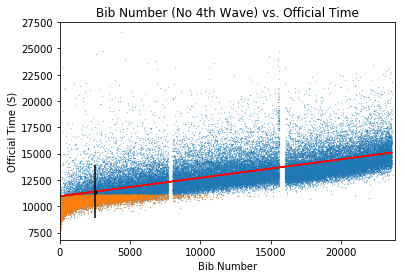

In [13]:
print(f'Prediction Interval: {interval:.0f}')
print(f'95% confidence interval for bib number 2500: {lower:.0f} to {upper:.0f}')

# plot dataset and prediction with interval
plt.scatter(xx_data, yy_data, s=0.03)
plt.plot(xx_data, regression_eq, color='red')

plt.errorbar(2500, y_2500, yerr=interval, color='black', fmt='o', ms=3)
plt.scatter(zx_data, zy_data, s = 0.03)
plt.xlim(0, 23800)
plt.title('Bib Number (No 4th Wave) vs. Official Time')
plt.xlabel('Bib Number')
plt.ylabel('Official Time (S)')

plt.savefig('Images/error_bar.png')
plt.show()